# Project 5 - Apple Clustering - Wilfredo Aaron Sosa Ramos

# Data Ingestio Technique

# Phase 1: Ingest

Connect to Google Drive

In [ ]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Load the dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AI/Project 5/dataset/apple_quality.csv')

In [ ]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
df.drop("A_id", axis=1, inplace=True)
df.drop(df.tail(1).index, inplace=True)

In [ ]:
df.shape

(4000, 8)

In [ ]:
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
df.isna().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.1+ KB


Partition Clustering: Assume the x number of clusters and partition the data into that amount of divisions

Number of clusters is known before of performing clustering in Partition Clustering (Sundaram, 2021 => https://www.kaggle.com/code/gireeshs/complete-guide-to-clustering-techniques)

# Phase 2: Filter/Clean

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

In [ ]:
one_hot_cols = ['Quality']
scaled_cols = [col for col in df.columns if col not in one_hot_cols]

In [ ]:
transformers = [
    ('one_hot', OneHotEncoder(), one_hot_cols),
    ('scaler', StandardScaler(), scaled_cols)
]

In [ ]:
column_transformer = ColumnTransformer(transformers, remainder='passthrough')

In [ ]:
transformed_data = column_transformer.fit_transform(df)

In [ ]:
encoded_columns = column_transformer.named_transformers_['one_hot'].get_feature_names_out(input_features=one_hot_cols)
scaled_columns = scaled_cols
all_columns = list(encoded_columns) + scaled_columns

df_transformed = pd.DataFrame(transformed_data, columns=all_columns)

In [ ]:
df_transformed.head()

,Quality_bad,Quality_good,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,0.0,1.0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415
1,0.0,1.0,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997
2,1.0,0.0,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044
3,0.0,1.0,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315
4,0.0,1.0,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472


In [ ]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Quality_bad   4000 non-null   float64
 1   Quality_good  4000 non-null   float64
 2   Size          4000 non-null   float64
 3   Weight        4000 non-null   float64
 4   Sweetness     4000 non-null   float64
 5   Crunchiness   4000 non-null   float64
 6   Juiciness     4000 non-null   float64
 7   Ripeness      4000 non-null   float64
 8   Acidity       4000 non-null   float64
dtypes: float64(9)
memory usage: 281.4 KB


# Phase 3: Store (Load)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(init="random", n_clusters=3)
km.fit(df_transformed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3)

In [ ]:
km.cluster_centers_

array([[ 0.33928571,  0.66071429, -0.83773419,  0.07637314,  0.89861932,
        -0.25809176,  0.30386539, -0.00605851, -0.30891663],
       [ 0.79107374,  0.20892626,  0.05288795,  0.02472036, -0.6335162 ,
         0.11098548, -0.6352877 ,  0.54611504, -0.40919999],
       [ 0.29264476,  0.70735524,  0.70689408, -0.10018192, -0.0605323 ,
         0.10323346,  0.488896  , -0.65506185,  0.77927163]])

In [ ]:
km.labels_

array([0, 0, 2, ..., 1, 0, 2], dtype=int32)

Solution of the optimal number of clusters (https://www.kaggle.com/code/gireeshs/complete-guide-to-clustering-techniques)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

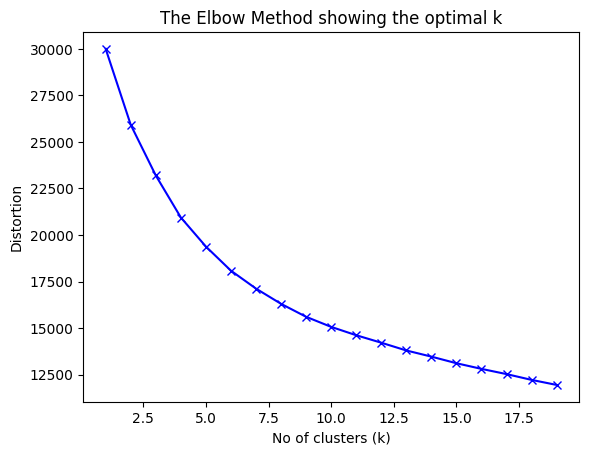

In [ ]:
import matplotlib.pyplot as plt

distortions = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_transformed)
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('No of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


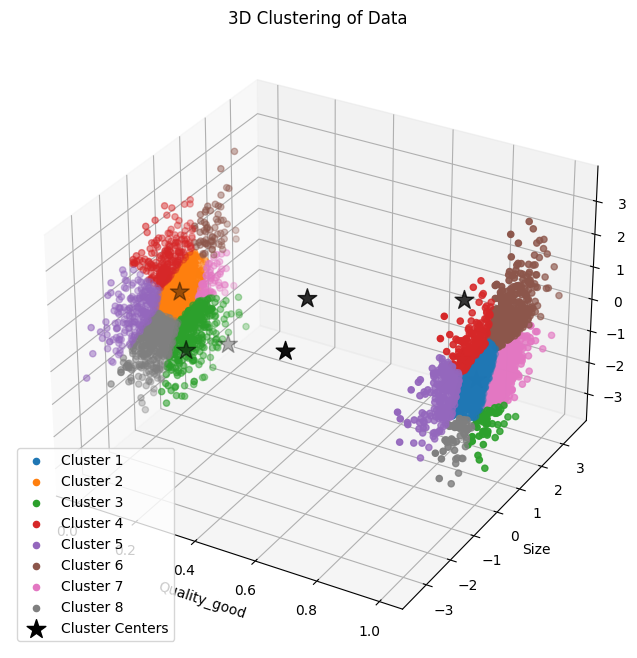

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

dimensions = ["Quality_good", "Size", "Juiciness"]

X = df_transformed[dimensions]

kmeans = KMeans(n_clusters=8, init='k-means++')
kmeans.fit(X)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in range(8):
    ax.scatter(X.loc[labels == label, dimensions[0]],
               X.loc[labels == label, dimensions[1]],
               X.loc[labels == label, dimensions[2]],
               label=f'Cluster {label + 1}')

ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], s=200, c='black', marker='*', label='Cluster Centers')

ax.set_xlabel(dimensions[0])
ax.set_ylabel(dimensions[1])
ax.set_zlabel(dimensions[2])
ax.set_title('3D Clustering of Data')

plt.legend()
plt.show()